In [301]:
import cv2
import numpy as np
import time
from matplotlib.pyplot import imshow,title, plot, subplot, grid, subplots_adjust,yscale, xscale,axis
%matplotlib inline

np.random.seed(0)

<h2>Attempt 1: Generating a standard normal filter (1d,2d)</h2>
<p> A standard normal filter was generated using numpy's standard normal function. 
The results are as follows :
<table>
    <tr>
        <td>Type</td>
        <td>Runtime</td>
    </tr>
    
    <tr>
        <td>1d-separable</td>
        <td>0.093036 s</td>
    </tr>
    
    <tr>
        <td>2d</td>
        <td>0.039872 s</td>
    </tr>
    
</table>

</p>


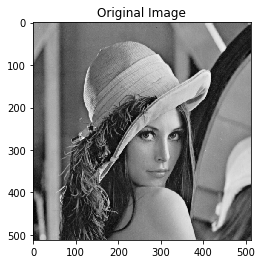

In [302]:
image = cv2.imread('lena_gray.jpg',0)

imshow(image, cmap='gray');
title('Original Image');

In [303]:
# For 1D separable
start_time = time.clock()

xr = np.random.standard_normal(100)
xc = np.random.standard_normal(100)

yr = np.random.standard_normal(100)
yc = np.random.standard_normal(100)

gx = cv2.sepFilter2D(image, -1, xr, xc)
gy = cv2.sepFilter2D(image, -1, yr, yc)

g = np.sqrt(gx*gx + gy*gy).astype('float')

time_diff = time.clock() - start_time
print('Standard Normal: Time_1D: {} s'.format(time_diff))

Standard Normal: Time_1D: 0.093036 s


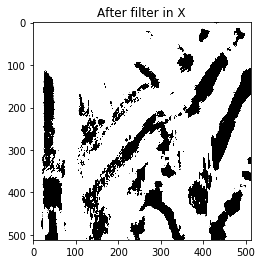

In [304]:
imshow(gx, cmap='gray');
title('After filter in X');

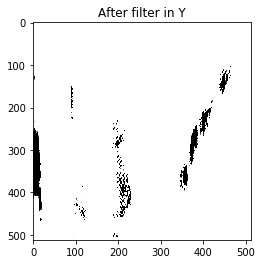

In [305]:
imshow(gy, cmap='gray');
title('After filter in Y');

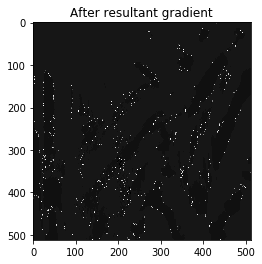

In [306]:
imshow(g, cmap='gray');
title('After resultant gradient');

In [307]:
# For 2D 
start_time = time.clock()

x = np.outer(xr,xc)
y = np.outer(yr,yc)

gx = cv2.filter2D(image, -1, x)
gy = cv2.filter2D(image, -1, y)

g = np.sqrt(gx*gx + gy*gy).astype('float')

time_diff = time.clock() - start_time
print('Standard Normal: Time_2D: {} s'.format(time_diff))

Standard Normal: Time_2D: 0.039872 s


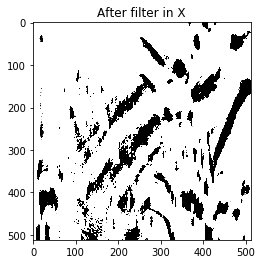

In [289]:
imshow(gx, cmap='gray');
title('After filter in X');

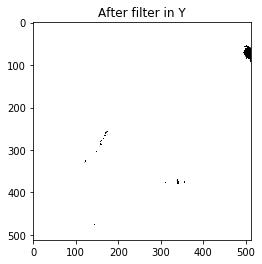

In [290]:
imshow(gy, cmap='gray');
title('After filter in Y');

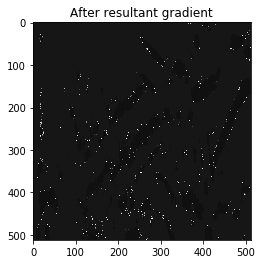

In [291]:
imshow(g, cmap='gray');
title('After resultant gradient');

<h2>Attempt 2: Generating Gabor Filter (1D, 2D)</h2>
<p>
The results are as follows :
<table>
    <tr>
        <td>Type</td>
        <td>Runtime</td>
    </tr>
    
    <tr>
        <td>Gabor-1D</td>
        <td>0.122047 s</td>
    </tr>
    
    <tr>
        <td>Gabor-2D</td>
        <td>0.041958 s</td>
    </tr>
    
</table>
</p>

Time_2d = 0.024979


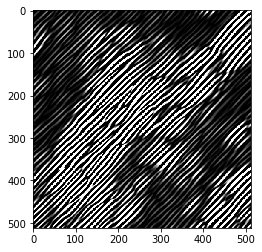

In [308]:
## Testing code for gabor ##  
start_time = time.clock()
gk = cv2.getGaborKernel((100, 100), 8.0, np.pi/4, 10.0, 0.5, 0, ktype=cv2.CV_32F)
fimg = cv2.filter2D(image, -1, gk)
time_diff = time.clock() - start_time
print('Time_2d = {}'.format(time_diff))
imshow(fimg, cmap='gray');

In [309]:
## 1D gabor filter
start_time = time.clock()
gxr = cv2.getGaborKernel((100, 1), 8.0, np.pi/4, 10.0, 0.5, 0, ktype=cv2.CV_32F)
gxc = cv2.getGaborKernel((1, 100), 8.0, np.pi/4, 10.0, 0.5, 0, ktype=cv2.CV_32F)

gyr = cv2.getGaborKernel((100, 1), 4.0, np.pi/2, 5.0, 0.25, 0, ktype=cv2.CV_32F)
gyc = cv2.getGaborKernel((1, 100), 4.0, np.pi/2, 5.0, 0.25, 0, ktype=cv2.CV_32F)

gx = cv2.sepFilter2D(image, -1, gxr, gxc)
gy = cv2.sepFilter2D(image, -1, gyr, gyc)

g = np.sqrt(gx*gx + gy*gy).astype('float')

time_diff = time.clock() - start_time

print('Gabor Filter: Time_1D = {} s'.format(time_diff))

Gabor Filter: Time_1D = 0.122047 s


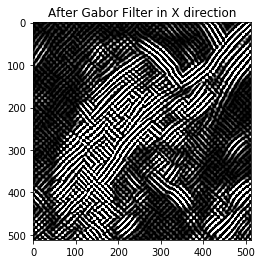

In [310]:
imshow(gx,cmap='gray');
title('After Gabor Filter in X direction');

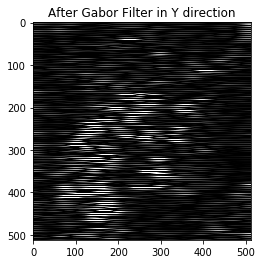

In [311]:
imshow(gy,cmap='gray');
title('After Gabor Filter in Y direction');

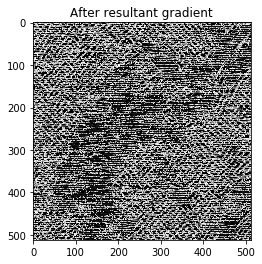

In [312]:
imshow(g,cmap='gray');
title('After resultant gradient');

In [313]:
## 2D Gabor filter 

start_time = time.clock()
gkx = cv2.getGaborKernel((100, 100), 8.0, np.pi/4, 10.0, 0.5, 0, ktype=cv2.CV_32F)
gky = cv2.getGaborKernel((100, 100), 4.0, np.pi/2, 5.0, 0.25, 0, ktype=cv2.CV_32F)

gx = cv2.filter2D(image, -1, gkx)
gy = cv2.filter2D(image, -1, gky)

g = np.sqrt(gx*gx + gy*gy).astype('float')

time_diff = time.clock() - start_time

print('Gabor Filter: Time_2D = {} s'.format(time_diff))

Gabor Filter: Time_2D = 0.041958 s


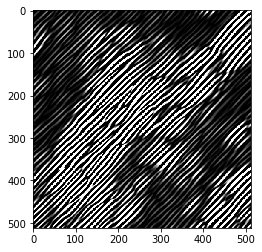

In [314]:
imshow(gx,cmap='gray');

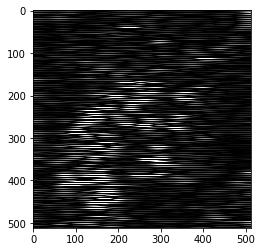

In [315]:
imshow(gy,cmap='gray');

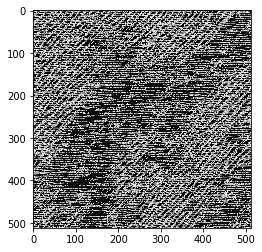

In [316]:
imshow(g,cmap='gray');